# 5SSG2060 Practical Week 6 :  Spatial Operation & Buffering
<a href="#This Week's Overview">This Week's Overview</a>

<a href="#Learn Outcomes">Learn Outcomes</a> 

<a href='#Get prepared'>Get prepared</a>

<a href='#Point Data'>Point Data</a>
  - <a href='#Aspatial inquiry and spatial visualization'>Aspatial inquiry and spatial visualization<a/>
  - <a href='#Measure distances between points'>Measure distances between points<a/>
    
<a href='#Linestring Data'>Linestring Data</a>
  - <a href='#Geo-location and spatial operation'>Geo-location and spatial operation<a/>
  - <a href='#Spatial relationships between point and line'>Spatial relationships between point and line<a/>
  - <a href='#Buffer'>Buffer<a/>
    
<a href='#Polygon Data'>Polygon Data</a>

<a href='#Spatial relationships and operations'>Spatial relationships and operations<a/>
  - <a href='#Intersections'>Intersections<a/>
  - <a href='#Difference'>Difference<a/>
  - <a href='#Union and Cascaded Union'>Union and Cascaded Union<a/>

<a href='#Get stations and railways within City of London'>Get stations and railways within City of London</a>
  - <a href='#Clip stations within city of london'>Clip stations within city of london<a/>
  - <a href='#Clip railways within City of London'>Clip railways within City of London<a/>
  - <a href='#Join the spatial data'>Join the spatial data<a/>

# <a id="This Week's Overview">This Week's Overview</a>

In this practical, besides of the `GeoPandas` introduced in previous weeks, we are going to practice the skills using [Shapely](https://pypi.org/project/Shapely/) in `PyPI`, for manipulation and analysis of planar geometric objects. You may want to explore its functions through [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html) on adding the functionality to work with planar geometric features, including the creation and manipulation of geometries such as points, polylines, and polygons; get familiar with topology on proximity (including adjacency, connectivity and containment) relationships, as well as spatial analysis functions, e.g.intersection, union, dissolve, etc.

It is based on the widely deployed [GEOS](https://trac.osgeo.org/geos/) library (the engine of [PostGIS](http://postgis.refractions.net)) and Java Topology Suite  (JTS) (from which GEOS is ported) libraries. GEOS implements the OpenGIS Simple Features for SQL spatial predicate functions and spatial operators. `Shapely` is not concerned with data formats or coordinate systems, but can be readily integrated with other packages. It provides spatial analysis methods that return new geometric objects. To complete the first section on spatial operation, we will use the following datasets: London stations as Point data, London railways as Polyline data and London LSOAs as Polygon data.



# <a id="Learn Outcomes">Learn Outcomes</a>
In previous practicals, we had introduced main geometric objects, the spatial operations and queries on them, as well as the ways to measure distance and proximity (produce buffers), and tessellate space (Voronoi diagrams). By the end of this practical, you should be able to
- Gain familiarity with core geometric types (Point, LineString, Polygon, and their collection types)
- Make spatial and aspatial inqueries
- Identify spatial relationships 
- Conduct spatial operations to visualize multi-layers 

# <a id="Get prepared">Get prepared</a>

In [4]:
import os
import urllib
import zipfile
import numpy as np
import pysal
from pysal.contrib import shapely_ext
import scipy.spatial as spatial
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
import shapely.geometry
from shapely.geometry import Point
import matplotlib as mpl
import matplotlib.path as path
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

Basic geometric types
------------------------------
For Geospatial vector data in Python, they normally have geometric features, and the 3 fundemental geometric types of objects are:
- Point data: represents a single point in space.
- Polyline data ("LineString"): represents a sequence of points that form a line.
- Polygon data: represents a filled area.

Each of them can be combined in [multi-part geometries](https://shapely.readthedocs.io/en/stable/manual.html#geometric-objects) for extensive overview.

## <a id="Point Data">Point Data</a>

Our first primitive geometry type is **Point**, by importing from shapely\'s `geometry` module. Let's start with a simple customized 2D point example:

In [2]:
from shapely.geometry import Point

point_test=Point(1,1)
type(point_test)

shapely.geometry.point.Point

We defined ($x$,$y$) for point_test as (1,1), by calling the `type` function, we can get its type as `shapely.geometry.point.Point`. For geospatial data, we normally define its geometry by latitude and longitude coordinates. So let's have a look of the london stations data and save it as a .shp file.

In [5]:
# Create the data dir if it doesn't exist
if os.path.isdir('data') is not True:
    print("Creating 'data' directory...")
    os.mkdir('data')

# Configure the download
url  = 'https://github.com/cusp-london/Spatial-Data-Analysis/blob/master/london-stations.csv?raw=true'
path = os.path.join("data","london-stations.csv")

# Download
r    = urllib.request.urlretrieve(url, path)

In [6]:
# read the csv file using Pandas
stations=pd.read_csv('data/london-stations.csv') 

In [7]:
# get information on data shape and types for each column 
# ??? replace
stations.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 8 columns):
id              306 non-null int64
latitude        306 non-null float64
longitude       306 non-null float64
name            306 non-null object
display_name    200 non-null object
zone            306 non-null float64
total_lines     306 non-null int64
rail            306 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 19.2+ KB


How many stations been recorded in London? For spatial analysis, we need further set up the geometry for this data using its coordinates information by calling `Shapely.geometry.Point`, and save it permanently into disk as a shapefile. 

In [8]:
# Set up geodataframe, initially with CRS = WGS84 (since that matches the lon and lat co-ordinates)
crs = {'init':'epsg:4326'}
# define the geometry of points with coordinates
geometry = [shapely.geometry.Point(xy) for xy in zip(stations['longitude'], stations['latitude'])]

stations = gpd.GeoDataFrame(stations, 
                          crs = crs, 
                          geometry = geometry)
# convert the .csv file into .shp file 
stations.to_file(driver='ESRI Shapefile', filename='data/stations.shp')

We use Geopandas's GeodataFrame to define the essential elements for geospatial data, i.e. crs and geometry. A coordinate reference system (CRS) determines how the 2D coordinates of the geometry objects should be related to actual places on the earth, see https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/coordinate_reference_systems.html for further information. 

Now the london stations data had already saved in your data folder as shapefile, and you may want to try open it in QGIS or ArcGIS by data importing. We can get a brief idea of the layout by conducting plot operation as usual:

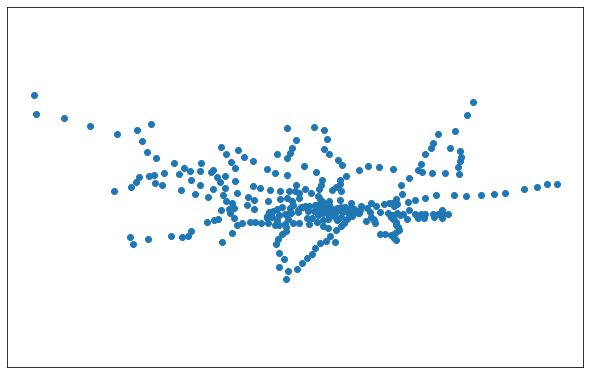

In [9]:
# Plot map
fig, ax = plt.subplots(1,
                       figsize = (8,5),
                       dpi = 72,
                       facecolor = 'white')

ax.set_position([0,0,1,1])   # Puts axis to edge of figure
ax.set_axis_on()            # Turns axis on
# If you want the facecolour applies to axis area as well as bit around the outside
# you may choose to turn the axis off
ax.get_xaxis().set_visible(False)   # Turns the x axis off so that 'invisible' axis labels don't take up space
ax.get_yaxis().set_visible(False)
lims = plt.axis('equal')
stations.plot(ax=ax)
plt.show()

### <a id="Aspatial inquiry and spatial visualization">Aspatial inquiry and spatial visualization<a/>
It is common to conduct aspatial inquiries when dealing with your own data. So let's start with finding the stations within Zone 1:
1. Locate the stations within london transportation Zone 1 and get it plotted as map for information.
2. Save stations in Zone 1 as a new shapefile.
3. Get ideas on the differences between these two shapefiles' point features by calling `Shapely.MultiPoint`.

In [10]:
stations['zonename']=np.where(stations['zone']<=1,'zone1','out of zone 1')
stations.head()

,id,latitude,longitude,name,display_name,zone,total_lines,rail,geometry,zonename
0,1,51.5028,-0.2801,Acton Town,Acton<br />Town,3.0,2,0,POINT (-0.2801 51.5028),out of zone 1
1,2,51.5143,-0.0755,Aldgate,NaN,1.0,2,0,POINT (-0.0755 51.5143),zone1
2,3,51.5154,-0.0726,Aldgate East,Aldgate<br />East,1.0,2,0,POINT (-0.0726 51.5154),zone1
3,4,51.5107,-0.0130,All Saints,All<br />Saints,2.0,1,0,POINT (-0.013 51.5107),out of zone 1
4,5,51.5407,-0.2997,Alperton,NaN,4.0,1,0,POINT (-0.2997 51.5407),out of zone 1


`numpy.where` function can help to define our targeted area "zone value <=1" with a new value "zone1" under new column "zonename", while the remaining stations will be valued as "out of zone 1". To highlight the difference, we will use different colors to plot them:

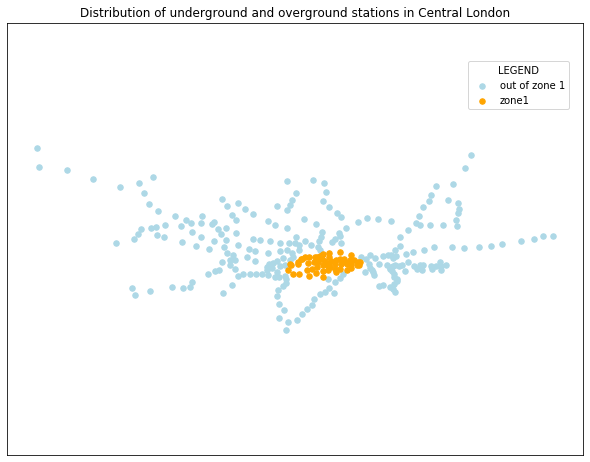

In [11]:
pointsPalette = {'zone1': 'orange', 'out of zone 1': 'lightblue'}

fig, ax = plt.subplots(1,
                       figsize = (8,6),
                       dpi = 72,
                       facecolor = 'white')

for ctype, data in stations.groupby('zonename'):
    color = pointsPalette[ctype]
    label = ctype 
    data.plot(color=color,
              ax=ax,
              label=label,
              markersize=30)
ax.set_position([0,0,1,1])   # Puts axis to edge of figure
ax.set_axis_on() 
ax.get_xaxis().set_visible(False)   
ax.get_yaxis().set_visible(False)
lims = plt.axis('equal')
ax.set(title='Distribution of underground and overground stations in Central London')
ax.legend(fontsize=10,
          frameon=True,
          loc=(.8, .8),
          title="LEGEND")
plt.show()

### <a id="Task 1">Task 1<a/> 
Can you get the number of stations within Zone 1? You should get an answer around 60. Then please save these points into your directory as `stations_zone1.shp`, with CRS at EPSG: 4326.

In [12]:
# your code here
stations_zone1 = stations[(stations['zonename']=='zone1')]
stations_zone1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 60 entries, 1 to 291
Data columns (total 10 columns):
id              60 non-null int64
latitude        60 non-null float64
longitude       60 non-null float64
name            60 non-null object
display_name    37 non-null object
zone            60 non-null float64
total_lines     60 non-null int64
rail            60 non-null int64
geometry        60 non-null object
zonename        60 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 5.2+ KB


In [13]:
# your code here
crs = {'init':'epsg:4326'}
# define the geometry of points with coordinates
geometry_zone1 = [shapely.geometry.Point(xy) for xy in zip(stations_zone1['longitude'], stations_zone1['latitude'])]
stations_zone1_df = gpd.GeoDataFrame(stations_zone1, 
                          crs = crs, 
                          geometry = geometry_zone1)
stations_zone1_df.to_file(driver='ESRI Shapefile', filename='data/stations_zone1.shp')

Similarly, you may want to repeat these steps to get stations within Zone 3 or out of Zone 3. Feel free to have a try when you complete this whole practical. But now, let's continue to explore the newly generated data: list the coordinates information for these 60 stations in Zone 1. There are 2 ways to get the list, quite similar to each other.

In [14]:
# check output format for column geometry 
stations_zone1.geometry

1                   POINT (-0.0755 51.5143)
2                   POINT (-0.0726 51.5154)
5                   POINT (-0.1058 51.5322)
9                   POINT (-0.1571 51.5226)
11                  POINT (-0.0886 51.5133)
12                  POINT (-0.0979 51.5204)
16                  POINT (-0.1879 51.5121)
22                   POINT (-0.1031 51.512)
25                  POINT (-0.1494 51.5142)
26     POINT (-0.09429999999999999 51.5011)
37     POINT (-0.09039999999999999 51.5113)
40                  POINT (-0.1111 51.5185)
41                   POINT (-0.1247 51.508)
49                  POINT (-0.1243 51.5129)
67                  POINT (-0.1679 51.5199)
68                    POINT (-0.17 51.5203)
71                  POINT (-0.1223 51.5074)
72                  POINT (-0.1337 51.5282)
73                   POINT (-0.1359 51.526)
75                  POINT (-0.1053 51.5203)
82                  POINT (-0.1829 51.4945)
85                  POINT (-0.1347 51.5205)
87                  POINT (-0.14

As the geometry takes format as POINT (longitude, latitude), we can use it to draw a bounding polygon for stations within zone 1 by calling Shapely's `MultiPoint`. The methods could be either `convex hull` or `envelope` as introduced in previous weeks. Try to explore both datasets and methods, and identify their differences.

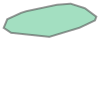

In [15]:
from shapely.geometry import MultiPoint
# the geometry for stations within zone 1 is a list of (longitude, latitude) tuples
# the convex hull of this set of 60 points is like an elastic band stretched around the geometry
zone1hull = MultiPoint(geometry_zone1).convex_hull
zone1hull

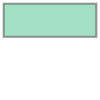

In [16]:
# The envelope is the point or smallest rectangular polygon (with sides parallel to the coordinate axes) 
# that contains the geometry
zone1enve = MultiPoint(geometry_zone1).envelope
zone1enve

The coordinates of the envelope polygon above could be derived by calling bounding box `bounds` from `MultiPoint`. The bounding box is a (minx, miny, maxx, maxy) tuple.

In [17]:
zone1bounds = MultiPoint(geometry_zone1).bounds
zone1bounds

(-0.1925, 51.4893, -0.0726, 51.5322)

### <a id="Task 2">Task 2<a/>
Please get your codes to work out the convex hull, envelope and coordinates of bounds for all stations point data. Then try to compare the results. Your codes below:

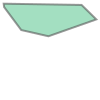

In [18]:
# the geometry for all stations 
stationhull = MultiPoint(stations.geometry).convex_hull
stationhull

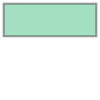

In [19]:
zoneenve = MultiPoint(stations.geometry).envelope
zoneenve

In [20]:
# compare the total stations' bounds
# your code here
stabounds = MultiPoint(stations.geometry).bounds
stabounds 

(-0.611, 51.4022, 0.251, 51.7052)

### <a id='Measure distances between points'>Measure distances between points<a/>

In real society, it is often to measure the distances between two targeted observations, say point data. So we will call `Shapely` to measure the distances in different ways: e.g., Euclidean distance, Manhattan distance, Shortest-path distance and Travel-time distance. In this practical, we will use the common Euclidean distance introduced in lecture, to measure the distances between named stations within Zone 1 (**Westminster, Holborn, Bank**) as example. 

The primary idea is to get their coordinates from their longitude and latitude information. However, please keep in mind that the measurement unit should be **meters**, so we need to turn their `CRS` into National Grid Coordinates EPSG:27700 as the starting point.

### <a id="Task 3">Task 3<a/>
1. Reproject the **crs** for stations in Zone 1 data to EPSG 27700;
2. Print out the **geometry** for targeted 3 stations. **Hint**: find the specific "name" from dataframe, then print out the geometry information for the dataframe.

In [21]:
# Your code here
dis_stations1_df=stations_zone1_df.to_crs(epsg=27700)

In [22]:
# Your code here
print (dis_stations1_df[dis_stations1_df['name'] == 'Westminster'].geometry)
print (dis_stations1_df[dis_stations1_df['name'] == 'Holborn'].geometry)
print (dis_stations1_df[dis_stations1_df['name'] == 'Bank'].geometry)

251    POINT (530213.5265728871 179672.6554047047)
Name: geometry, dtype: object
107    POINT (530541.4653590431 181506.0026639528)
Name: geometry, dtype: object
11    POINT (532731.9000611381 181106.5061002165)
Name: geometry, dtype: object


Once you complete Task 3, we can define their coordinates to points, and get a rough idea of their relative distribution.

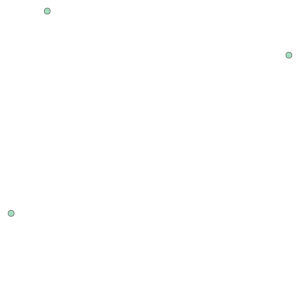

In [23]:
# measure their distance using shapely
from shapely.geometry import Point
p1=Point(530213.5265728871, 179672.6554047047) # Westminster
p2=Point(530541.4653590431, 181506.0026639528) # Holborn
p3=Point(532731.900061138, 181106.5061002172) # Bank
mp=MultiPoint([p1, p2, p3])
mp

To measure the distances between them, we can simply call shapely's `distance` function. 

In [24]:
# minimum distance from p1 to p2
print("Distance between Westminster and Holborn is: "+str("%.2f"%p1.distance(p2))+" meters") 
# you may swap p1 and p2, see whether any difference
# minimum distance from p2 to p3
print("Distance between Holborn and Bank is: "+str("%.2f"%p2.distance(p3))+" meters")
# minimum distance from p1 to p3
print("Distance between Westminster and Bank is: "+str("%.2f"%p1.distance(p3))+" meters")

Distance between Westminster and Holborn is: 1862.45 meters
Distance between Holborn and Bank is: 2226.57 meters
Distance between Westminster and Bank is: 2897.95 meters


It returns the minimum distance in float format, and there is also `hausdorff_distance` returning to the furthest distance. However, for our listed 3 points the results are the same, you are encouraged to replace the `distance` function with `hausdorff_distance` for comparison if interested; you are also welcome to choose other stations for calculation if any interest.

## <a id='Linestring Data'>Linestring Data</a>
The second geometric type is **Polyline**, and defined as Linestring in Shapely by calling its `LineString` function. We will use the London Railways data for this section to get familiar with linestring's features. The data is available for downloading from OpenStreetMap as a shapefile data; to save time, I've already prepared it as zipfile in Github, so we should firstly read the London railways data into a geopandas DataFrame, and have a look of the features.

In [27]:
# Configure the download
url  = 'https://github.com/cusp-london/Spatial-Data-Analysis/blob/master/railways.zip?raw=True'
path = os.path.join("data","railways.zip")

# Download
r    = urllib.request.urlretrieve(url, path)

# Unzip it into the data folder
z    = zipfile.ZipFile(path)
m    = z.extractall("data")

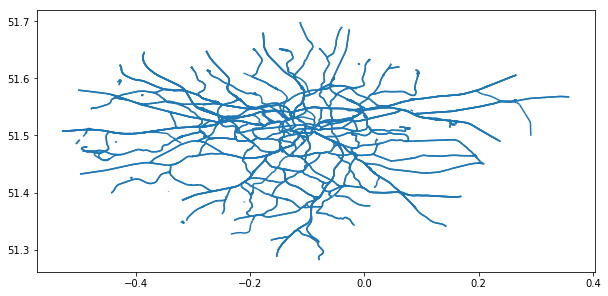

In [29]:
railways = gpd.read_file('data/railways/gis_osm_railways.shp')
railways.plot(figsize=(10,8))

### <a id="Task 4">Task 4<a/>
Write your codes below to answer questions on: 
1. The geometric type for railways.
2. How many polylines in this dataset?

In [30]:
# your code here 
railways.head()

,osm_id,code,fclass,name,geometry
0,30804,6101,rail,Lea Valley Lines,"LINESTRING (0.0048644 51.6279262, 0.0061979 51..."
1,101298,6103,subway,Hammersmith and City Line,"LINESTRING (-0.2249632 51.4935445, -0.2250662 ..."
2,101486,6103,subway,Hammersmith and City Line,"LINESTRING (-0.2055497 51.5195429, -0.2051377 ..."
3,101511,6101,rail,Great Western Main Line,"LINESTRING (-0.2040676 51.5221421, -0.2046182 ..."
4,282898,6103,subway,Northern Line (High Barnet Branch),"LINESTRING (-0.1862586 51.6159083, -0.1868721 ..."


In [31]:
# your code here 
railways.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12118 entries, 0 to 12117
Data columns (total 5 columns):
osm_id      12118 non-null object
code        12118 non-null int64
fclass      12118 non-null object
name        6686 non-null object
geometry    12118 non-null object
dtypes: int64(1), object(4)
memory usage: 473.4+ KB


From the outputs you got, we can tell that there are 12118 polylines, all of which are geometrically Linestring. 
Before we conduct any spatial operations between different datasets, it is good practice to check their **crs** information. Although we had already checked the **crs** for london stations point data, we need to keep other spatial layers (polyline or polygon) consistent with each other. So let's check the .crs attribute for railways data as well.

In [32]:
railways.crs

{'init': 'epsg:4326'}

You may reach at a WGS84 (EPSG: 4326) crs for the railways data, and we need to set it to OSGB 1936(EPSG:27700) to match the stations data. So let's get the new geometry set:

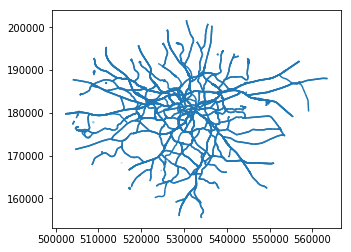

In [33]:
new_railways=railways.to_crs(epsg=27700)
new_railways.plot() # check the difference between 2 plots with varied CRS

You will find the railway map has been stretched vertically from the view, and now it is ready to be used for distance meansurement as well. Now let's explore the spatial relationships between points and polylines:

### <a id="Geo-location and spatial operation">Geo-location and spatial operation<a/>
    
In this section, we want to select a specific railway line in London, preferrably a line we are familiar with; to find out the spatial relationships between this line and selected points (stations in real society); and measure the distance from point to the line, if the point is not on it. So we need to set up following goals to realize step by step:
1. Find the **Circle lines** and save them together by selecting data calling `loc`.
2. Locate a specific sub-line in **circle lines** by calling `iloc`.
3. Get the geometric features for selected line, e.g. **length, bounds, buffer**.
4. Explore the spatial relationship between point and linestring by calling `within` and `contains`.
5. Measure the distance from a point to the linestring.

Furthermore, if you go back to check the headers for railways data, you will find a `name` column with the searching keywords we are interested (They are: 'Circle line','Circle/District Line' and 'Circle and District Lines'). In order to make it easier to select data by label or by a conditional statment (`.loc`), we can reset the index for each polyline with `name`. 

In [34]:
# we are going to search by name, so set name as the index
new_railways.set_index('name', inplace=True)
new_railways.head()

,osm_id,code,fclass,geometry
name,,,,
Lea Valley Lines,30804,6101,rail,LINESTRING (538867.4711152873 194026.755180087...
Hammersmith and City Line,101298,6103,subway,LINESTRING (523323.4100962133 178671.295357165...
Hammersmith and City Line,101486,6103,subway,LINESTRING (524600.1558239507 181595.289163355...
Great Western Main Line,101511,6101,rail,LINESTRING (524695.8863742831 181886.854900834...
Northern Line (High Barnet Branch),282898,6103,subway,LINESTRING (525672.7365395073 192344.625230402...


In [35]:
circleline=new_railways.loc[['Circle line','Circle/District Line', 'Circle and District Lines']]
circleline.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 117 entries, Circle line to Circle and District Lines
Data columns (total 4 columns):
osm_id      117 non-null object
code        117 non-null int64
fclass      117 non-null object
geometry    117 non-null object
dtypes: int64(1), object(3)
memory usage: 4.6+ KB


117 polylines have been selected based on our searching criterion, and combined into a new dataframe "circleline". For specific linestring, if we want to get more detailed information on its geometric coordinates, we can call `list` function to realize it. So in order to select a linestring object, we can use its row number by calling `iloc`; here I designedly choose the line at "74" (you will figure out my intention later), and we can get the points coordinates by calling `coords` as below:

In [36]:
# get the coordinates information on specific polyline
list(circleline.geometry.iloc[74].coords)

[(530428.0074790482, 180413.62381644384),
 (530411.1982466972, 180376.18195359968),
 (530397.0032235021, 180344.56021560577),
 (530379.2209069991, 180274.64529610798),
 (530371.9918020066, 180229.70448672207),
 (530359.5922412437, 180162.43145132513),
 (530350.0843889426, 180104.51306821645),
 (530346.4988183748, 180071.82826697844),
 (530340.3595443233, 180026.33684885327),
 (530313.7082672049, 179845.00756705605),
 (530306.1320168389, 179804.3421753893),
 (530297.7263252948, 179779.2342295017),
 (530282.1126631077, 179751.64929959673),
 (530261.5132050588, 179726.7408450343),
 (530225.9123594079, 179690.44300068263),
 (530180.0387492746, 179656.06340498675)]

How many points have been used to define this line? You can count it from the output (if you like), or call another method `len` to get the count directly.

In [37]:
len(circleline.geometry.iloc[74].coords) # measure the points building up this line

16

YES, you are right, `len` and `length` are different! For polylines, `len` counts the number of points to define linestring, and for this polyline, there are 16 points. However, it is not a fixed number, and the number of points to define a linestring varies. Try any other rows, to see the variations of points counts. Further step, let's try to call `length` to see what we will get:

In [38]:
circleline.geometry.iloc[74].length # measure the length of the railway line

822.556923061196

As we know the 16 points used to define specific section of circle line, we use their coordinates to define a new LineString named as circleline_74.

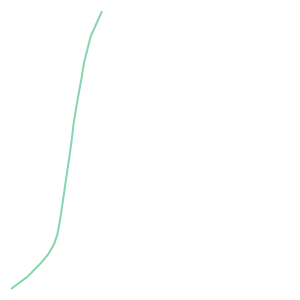

In [39]:
from shapely.geometry import LineString

circleline_74=LineString([(530428.0074790481, 180413.6238164446),
 (530411.1982466972, 180376.18195359968),
 (530397.0032235021, 180344.56021560577),
 (530379.2209069991, 180274.64529610798),
 (530371.9918020066, 180229.70448672207),
 (530359.5922412437, 180162.43145132443),
 (530350.0843889426, 180104.51306821714),
 (530346.4988183748, 180071.82826697844),
 (530340.3595443233, 180026.33684885327),
 (530313.7082672049, 179845.00756705605),
 (530306.1320168389, 179804.34217539),
 (530297.7263252948, 179779.2342295017),
 (530282.1126631077, 179751.64929959673),
 (530261.5132050588, 179726.7408450343),
 (530225.912359408, 179690.44300068187),
 (530180.0387492746, 179656.06340498675)])
circleline_74

Upon the plotting of this polyline, we can call `.bounds` method to get the coordinates for its bounding boxes, which are the coordinates for the left-bottom and right-top.

In [40]:
circleline_74.bounds

(530180.0387492746, 179656.06340498675, 530428.0074790481, 180413.6238164446)

### <a id="Spatial relationships between point and line">Spatial relationships between point and line<a/>

If you try to google the coordinates for 3 selected stations and the sub-section of circle line, you may find the Westminster station (point $p1$) should be on this line; so let's check it by calling either `within` or `contain`. Think of their relationship, it should be line contain point and point within line.

In [ ]:
# check whether point is within the line
p1.within(circleline_74)

In [ ]:
# check whether the line contains the point
circleline_74.contains(p1)

So far, from the boolean results, both return **False**, indicating a not contain/within relationship between the point and polyline. But you know it is not the truth, so what is the problem? Discuss with your neighbors about it. 

Before we work out the solution, there is a roundabout to find the reason...........measure the distance between point and line!

In [41]:
p1.distance(circleline_74)

6.805960502772793

It seems that the station is 6.8 meters away from the line, emmmmm, reasonable. So reflecting from the reality, it could be systematic error generated when collecting the original data; or the measuring of coordinates take different centroid/center point. So a commonly used way to fix this could be use `buffer` function.
### <a id="Buffer">Buffer<a/>
A buffer is a geometry with an envelope at a given distance from the object's envelope. So let's create a 10 metres (slightly larger than 6.8 meters) buffer zone for the named railway line. 

In [42]:
# Create buffer of 10 metres on the linestring geometry
circleline_74_buf=circleline_74.buffer(10)

The coordinates for boundings for the buffered zone are also derivable by `bounds`.

In [43]:
circleline_74_buf.bounds

(530170.048462802, 179646.07311851412, 530438.0031942755, 180423.6195316721)

Let's check the type of newly generated buffer data.

In [44]:
type(circleline_74_buf)

shapely.geometry.polygon.Polygon

It is no longer Linestring, and now become Polygon. If we try to plot both the linestring and its buffer:

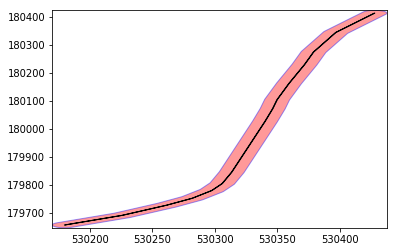

In [45]:
import descartes
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(circleline_74_buf, fc='r', ec='b', alpha=0.4)) # buffer area in red with 40% transparency
ax.add_patch(descartes.PolygonPatch(circleline_74.buffer(0.2))) # original linestring in black in the center
minx, miny, maxx, maxy = circleline_74_buf.bounds
ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy)
ax.set_aspect('auto') # normally use 'equal', here emphasing the buffering
plt.show()

Buffering helps us to widen the railway line by 10 meters, and we will further check whether the point locates within the buffered zone. So complete the following task by yourself.
### <a id="Task 5">Task 5<a/>
1. Test whether Westminster station is in the buffered zone of selected section for circle line.
2. Test whether the other point, Bank station, locates in the buffered zone for this line.

In [46]:
p1.within(circleline_74_buf)

True

In [47]:
circleline_74_buf.contains(p1)

True

Great! It is **True** now, which means Westminster station is actually on this line. We can try to check the containment of Bank station ($p3$) for this line as well, and do further measurement of the distance from $p3$ if not on this line. 

In [48]:
p3.within(circleline_74_buf)  # Bank

False

In [49]:
circleline_74_buf.contains(p3)

False

In [50]:
p3.distance(circleline_74_buf)

2395.831323322374

If you receive a **True** output, then try to interpret the result: 
It means ------------station is ------------ line. 

If you receive a **False** output, then further work out how far away from the line:
------------station is------------meters away from the specified circle line section.

## <a id="Polygon Data">Polygon Data<a/>

Thus far we have encountered two types of geometries for shapefiles, namely **Point** and **Linestring**, and now we will recap on the most familiar third type, **Polygon**, with London LSOA data as the example. Copy your LDN-LSOAs.shp into "data" folder.

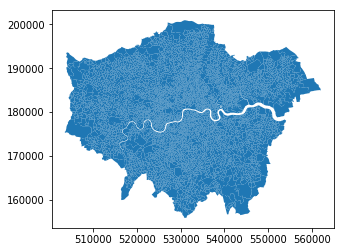

In [52]:
from shapely.geometry import Polygon
lsoas=gpd.read_file('data/LDN-LSOAs.shp')
lsoas.plot()

As you are familiar with Geodataframe, I leave it to you to get the information on data features by completing Task 6.
### <a id="Task 6">Task 6<a/>
1. This is a polygon, please check the geometry for polygon and its **crs**.
2. Try to measure the area and length of London LSOAs as polygon data. 
3. Get the coordinates of bounding box for London LSOAs.

In [53]:
# your code here
lsoas.geometry.head()

0    POLYGON ((532105.3302893325 182017.3864794874,...
1    POLYGON ((532747.0475768285 181793.0423077808,...
2    POLYGON ((532135.3847144214 182204.2750178791,...
3    POLYGON ((533808.1704519053 180773.9104895283,...
4    POLYGON ((545122.084155924 184321.0132629346, ...
Name: geometry, dtype: object

In [54]:
lsoas.area

0       1.333204e+05
1       2.261900e+05
2       5.730274e+04
3       1.907374e+05
4       1.441910e+05
5       1.981288e+05
6       1.934193e+05
7       1.285874e+05
8       3.488378e+05
9       9.029460e+04
10      1.403490e+05
11      2.086253e+05
12      3.401731e+05
13      2.799965e+05
14      1.961297e+05
15      1.607884e+05
16      1.735017e+05
17      1.818129e+05
18      1.884095e+05
19      1.713460e+05
20      1.283495e+05
21      2.133811e+05
22      1.279273e+05
23      1.505730e+05
24      1.481942e+06
25      1.471234e+05
26      2.530129e+05
27      2.835622e+05
28      8.435511e+05
29      3.792597e+05
            ...     
4805    1.045769e+05
4806    3.557667e+05
4807    8.697625e+04
4808    4.139251e+04
4809    7.789954e+04
4810    1.627635e+05
4811    2.614581e+05
4812    7.981460e+05
4813    9.166959e+05
4814    1.030891e+06
4815    1.596278e+05
4816    7.536052e+04
4817    6.911307e+05
4818    1.706361e+05
4819    1.999965e+05
4820    1.005906e+05
4821    4.218

In [55]:
lsoas.bounds

,minx,miny,maxx,maxy
0,531948.547595,181269.608710,532308.844964,182017.386479
1,532213.297703,181191.029966,532747.047577,182009.473209
2,532071.541553,181873.919048,532419.829361,182204.275018
3,533319.418341,180740.002653,533842.537665,181597.297481
4,544691.565951,184129.722637,545296.347224,184610.946492
5,543788.059540,184214.191194,544563.042332,184706.651310
6,543419.509813,183949.530716,543889.053244,184868.576422
7,544358.045135,184176.556261,544817.941184,184710.438329
8,543754.328757,183682.612515,544736.233452,184367.073752
9,544180.393628,184549.149978,544667.093193,184934.020219


What have you got? They should be 4835 measures for lsoa's area and length respectively. 

Since you've get your task done, let's have the 3 datasets plotted together for visualization.

[(160000, 200000), (500000, 560000)]

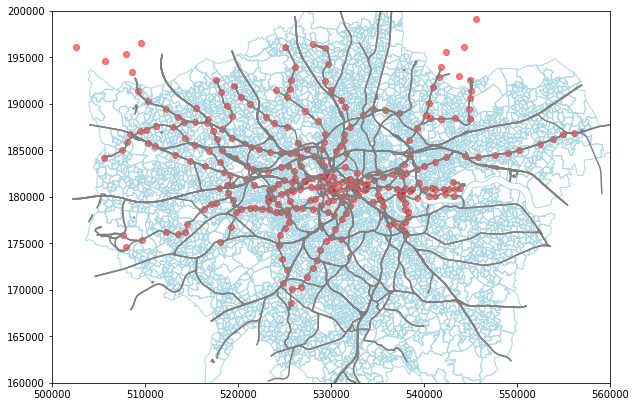

In [56]:
# Plot three layers in London together
stations=gpd.read_file('data/stations.shp')
new_stations=stations.to_crs(epsg=27700)

ax = lsoas.plot(edgecolor='lightblue', facecolor='none', figsize=(10, 8))
new_railways.plot(ax=ax, color='grey')
new_stations.plot(ax=ax, color='red', alpha=0.5)
ax.set(xlim=(500000, 560000), ylim=(160000, 200000))

## <a id="Spatial relationships and operations">[Spatial relationships and operations](https://en.wikipedia.org/wiki/Spatial_relation)<a/>

Geospatial data normally have their spatial relationships, e.g. overlap, intersect, contain, ..., etc., to describe how two or more spatial objects relate to each other. We had tried to explore the relationship between point and polyline about `contains` and `within`, and we will further explore their relationships with polygon.

<img  height="100" src="TopologicSpatialRelations2.png">

### <a id="Intersections">Intersections<a/>
The spatial intersection relationship happens between polygons, but we are going to practice it simply with our defined three points and their buffers. As you might notice the distances among these points, we will define a 1000 meters' buffer for test. In addition, the library `decartes` will be used to facilitate visualization of these operations:

In [57]:
from shapely.geometry import MultiPolygon
poly_1=p1.buffer(1000)
poly_2=p2.buffer(1000)
poly_3=p3.buffer(1000)
mp_buf = MultiPolygon((poly_1, poly_2, poly_3))

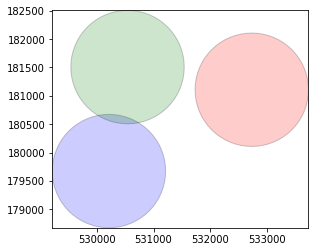

In [58]:
import descartes
ax = plt.gca()
ax.add_patch(descartes.PolygonPatch(poly_1, fc='b', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(poly_2, fc='g', ec='k', alpha=0.2))
ax.add_patch(descartes.PolygonPatch(poly_3, fc='r', ec='k', alpha=0.2))
minx, miny, maxx, maxy = mp_buf.bounds
ax.set_xlim(minx, maxx); ax.set_ylim(miny, maxy)
ax.set_aspect('equal')
plt.show()

In [59]:
# Testing the relationships 
poly_1.intersects(poly_2)

True

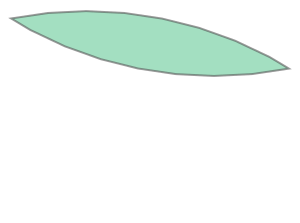

In [60]:
# Getting the object from this relationship 
int_1_2 = poly_1.intersection(poly_2)
int_1_2

The buffered polygon for $p1$ (blue) and $p2$ (green) are intersecting with each other, and. we plot out the object for intersected part. Now you may want to test the relationship between $p1$ and $p3$ by yourself.
### <a id="Task 7">Task 7<a/>

In [62]:
# Testing the relationships 
poly_1.intersects(poly_3)

False

In [63]:
# Getting the object from this relationship 
int_1_3 = poly_1.intersection(poly_3)
int_1_3

In [64]:
type(int_1_3)

shapely.geometry.collection.GeometryCollection

`Intersection` focuses on the shared part(s) between two polygons, but how if we want to find their differences?
### <a id="Difference">Difference<a/>
As the 1000 metres' buffer zone for Point $p1$ and Point $p2$ intersect with each other, we will continue with this data for `Difference` operation:

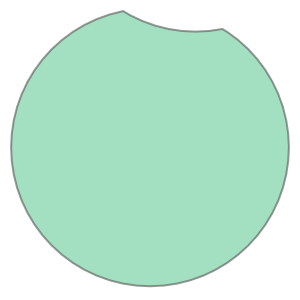

In [65]:
# the difference part in poly_1 from poly_2
poly_1.difference(poly_2)

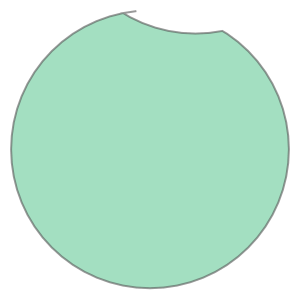

In [66]:
# difference between poly_1 and intersection part int_1_2
poly_1.difference(int_1_2)

You will find this is actually the buffered zone of $p1$, without its shared part with $p2$. The slight difference between these 2 outputs will be the outline of shared part. We could also do it in the other way:

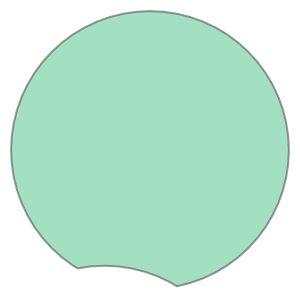

In [67]:
# your code here
poly_2.difference(poly_1)

Both `intersection` and `difference` are kind of "subtraction", how about "addition"?
### <a id="Union and Cascaded Union">Union and Cascaded Union<a/>    
If we want to get the "addition" of two objects, we may call `union` in `shapely`.

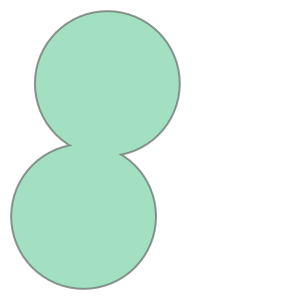

In [68]:
u_1_2 = poly_1.union(poly_2)
u_1_2

### <a id='Task 8'>Task 8<a/>
Once you've understood the rationale of these 3 spatial operations, try to complete this task by yourself.
- Union the difference part in poly_1 from poly_2, and the difference part in poly_2 from poly_1. 
- Further test the containment of point (531000, 180100) from your output of union.

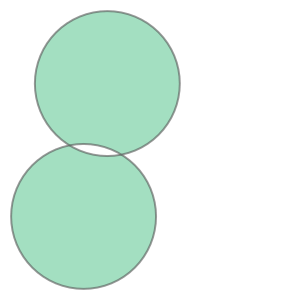

In [69]:
# your code here
d_1_2 = poly_1.difference(poly_2)
d_2_1 = poly_2.difference(poly_1)
d_1_2.union(d_2_1)

In [ ]:
# your code here
d_1_2_d_2_1=d_1_2.union(d_2_1)
p_test = Point(531000, 180100)
d_1_2_d_2_1.contains(p_test)

In [70]:
# your code here
d_1_2_d_2_1=d_1_2.union(d_2_1)
p_test = Point(531000, 180100)
d_1_2_d_2_1.contains(p_test)

True

You've got your outputs so far, however, if we change the method for union into `cascaded_union`, the results will vary. Try google the differences between these two union methods and discuss with your neighbors.

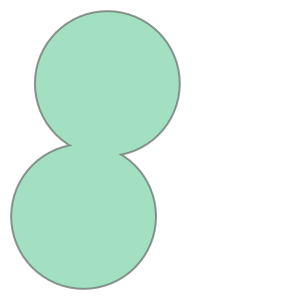

In [71]:
from shapely.ops import cascaded_union
cu = cascaded_union([d_1_2, d_2_1, int_1_2])
cu

Have you spotted out, which element is the crucial reason for the different union outputs? Why?

In [72]:
# test the containment of test point again
cu.contains(p_test)

True

Once you are happy with these operations on three main types of vector data. Let's define a specific region, which is City of London, and get the stations and railways within the area "cut" out.

## <a id='Get stations and railways within City of London'>Get stations and railways within City of London<a/>
To select only the railways within City of London, we could take several approaches. We have the lsoa layer for 4836 polygons, as well as the railway network layer for London with 12116 segments. We could then use the intersects method for each lsoa to test if it intersects with a particular segment of the railway network, and keep all the segments where we find an intersection with the lsoa.

Although this would work, it turns out to be very inefficient requiring we compare each lsoas against each railway segments and test for an intersection. If we think about our problem from a slightly different perspective, we know that if we find a segment that intersects with a lsoa within **city_ldn**, it must, by definition, intersect with the polygon, if we had such a thing. This would substantially reduce the number of intersection tests we need to conduct. We now only need compare 1 polygon against each of the railway segments. Great.

Before we start our computation, there is still one crucial thing to be solved: we do not yet have the magical **city_ldn** polygon, and this could be got by calling `Dissolve`.

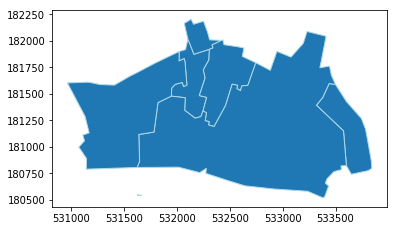

In [73]:
# find city of london polygon
lsoas.set_index('lsoa11nm', inplace=True)
city_ldn = lsoas.loc[['City of London 001A','City of London 001B', 'City of London 001C', 'City of London 001E', 'City of London 001F', 'City of London 001G']]
city_ldn.plot(edgecolor='lightblue')

We are going to dissolve all the lsoa boundaries that do not coincide with the boundary of the DataFrame\'s geometry collection. This is done by creating a new attribute that takes on the same values for each feature, and calling the `dissovle` method with that attribute
as the argument to the `by` option:

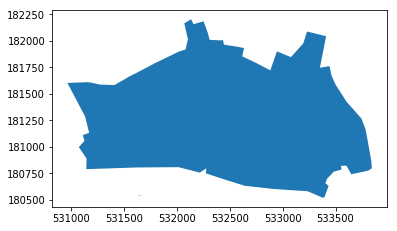

In [74]:
city_ldn['dummy'] = 1.0
city_london = city_ldn.dissolve(by='dummy')
city_london.plot()

Or else, we could also obtained this polygon by using the `unary_union` method of the GeoSeries, and this gives us a vector object combining all of the polygons in boundary layer. We would then have to construct a new GeoDataFrame with this as the Geometry column. 

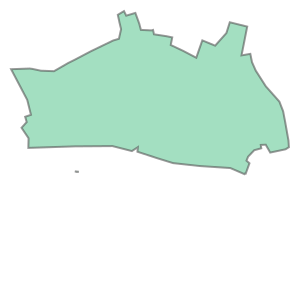

In [75]:
city_london_uu = city_ldn['geometry'].unary_union
city_london_uu

### <a id='Clip stations within city of london'>Clip stations within city of london<a/>
<img  height="100" src="clip.png">
When you clip a vector data set with another layer, you remove points, lines or polygons that are outside of the spatial extent of the area that you use to clip the data. (Image Source: ESRI)

We can do the `clip` operation by `intersects`: We firstly use the above created unified polygon **city_london_uu** to represent City of London area covered by clip layer. Next we can use the `intersects` method to select just the points within the stations object that fall within the geometry in **city_london_uu** object. It will return a boolean mask for every point and further subset the stations object.

In [76]:
stations_clip = new_stations[new_stations.geometry.intersects(city_london_uu)]
stations_clip.head()

,id,latitude,longitude,name,display_na,zone,total_line,rail,geometry
1,2,51.5143,-0.0755,Aldgate,None,1.0,2,0,POINT (533637.9301733428 181241.5310081635)
11,13,51.5133,-0.0886,Bank,None,1.0,4,0,POINT (532731.9000611381 181106.5061002165)
12,14,51.5204,-0.0979,Barbican,None,1.0,3,0,POINT (532066.0883800458 181879.2353912385)
22,25,51.5120,-0.1031,Blackfriars,None,1.0,2,0,POINT (531729.5506604993 180935.7638288926)
37,44,51.5113,-0.0904,Cannon Street,Cannon<br />Street,1.0,2,0,POINT (532612.8088212158 180880.8396237014)


### <a id='Clip railways within City of London'>Clip railways within City of London<a/>

In [77]:
spatial_index = new_railways.sindex
# Create a box for the initial intersection
bbox = city_london_uu.bounds
# Get a list of railway polylines that overlap the bounding box and subset the data to just those lines
sidx = list(spatial_index.intersection(bbox))
rail_sub = new_railways.iloc[sidx]

# Clip the data - with these data
railways_clip = rail_sub.copy()
railways_clip['geometry'] = rail_sub.intersection(city_london_uu)

# Return the clipped layer with no null geometry values
railways_clip[railways_clip.geometry.notnull()]

,osm_id,code,fclass,geometry
name,,,,
Central Line - Westbound,571633912,6103,subway,LINESTRING (533397.8579638728 181977.626042632...
Central Line - Eastbound,571633911,6103,subway,LINESTRING (533183.9460179799 181734.586727066...
"Circle, Hammersmith & City and Metropolitan lines",355004980,6103,subway,LINESTRING (532697.1930233516 181654.627244962...
"Circle, Hammersmith & City and Metropolitan lines",428585128,6103,subway,LINESTRING (532588.0828931642 181679.398243318...
Thameslink,17521901,6101,rail,LINESTRING (531659.0761174227 181566.529949794...
"Circle, Hammersmith & City and Metropolitan lines",162244572,6103,subway,LINESTRING (532580.1139208329 181694.257445731...
Central Line - Westbound,109746155,6103,subway,LINESTRING (533193.7285364789 181726.886690764...
Central Line - Eastbound,109746152,6103,subway,LINESTRING (533120.4553018841 181631.035523672...
Thameslink,111574256,6101,rail,LINESTRING (531632.150615562 181703.9994686753...


There are 227 segments of railways fall in City of London as shown. So let's plot the stations and railways within City of London together for a view.
### <a id="Task 9">Task 9<a/>
Recall you plotting skillks acquired before, plot three layers on stations, railways and LSOAs for City of London together. 

**Hint**: assign color 'grey' for railways, 'yellow' for stations, and edgecolor 'red', facecolor 'lightblue' for lsoas. Legend should be present, and be careful about your axis setting. 

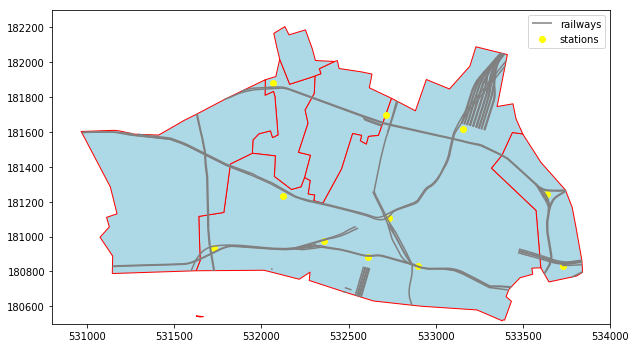

In [78]:
# your code here
ax = city_ldn.plot(edgecolor='red', facecolor='lightblue', figsize=(10, 8))
railways_clip.plot(ax=ax, color='grey', label='railways')
stations_clip.plot(ax=ax, color='yellow', label='stations')
ax.set(xlim=(530800, 534000), ylim=(180500, 182300))
ax.legend()

Here we go, let's check the containment of defined stations $p2$ and $p3$ in the city of london boundary.

In [79]:
p2.within(city_london_uu) # Holborn station

False

In [80]:
city_london_uu.contains(p3) # Bank station

True

As you may find Holborn station is not in City of London, but how far is it away from the area? and one step further, will a 1000 meters' buffer zone of Holborn station happened to overlap City of London somehow? Let's try practice our techniques acquired before. 

In [81]:
# your code here
p2.distance(city_london_uu)

436.3563284587689

In [82]:
# your code here
poly_1000=p2.buffer(1000)
poly_1000.intersects(city_london_uu)

True

### ! (Optional) Other realization of clipping :
If time permits, you may want to try other two ways to clip the railways in City of London: 

(1) use **lambdas**

(2) use loop.

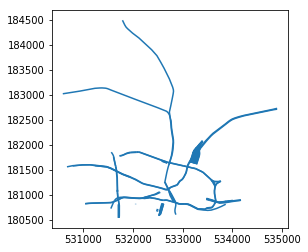

In [84]:
r = new_railways['geometry']
rc_routes = r[r.apply(lambda x: x.intersects(city_london.iloc[0]['geometry']))]
rc_routes.plot()

In [85]:
rc_routes.shape

(227,)

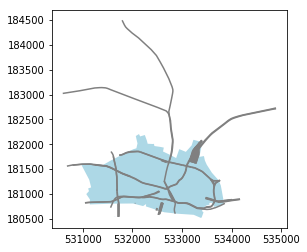

In [86]:
ax = plt.gca()
rc_routes.plot(ax=ax, edgecolor='grey')
city_london.plot(ax=ax, color='lightblue')
plt.show()

How do you think? **Lambdas** are handy, but tend to be a bit more difficult to read as \"anonymous functions\". So let's try another more \"transparent\" approach by using a simple loop. The rationale is to test the intersection between each railway segment and City of London, if the result returns to be true, then append the segment to a list and store the list of final segments intersecting with City of London.

In [87]:
rails = [] # create an empty list for further storage
for ids, route in enumerate(rc_routes):
    print(ids)
    rails.append(route.intersection(city_london.iloc[0]['geometry']))
# use list of intersection segments above into a GeoSeries:
rc_l = gpd.GeoSeries(rails)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226


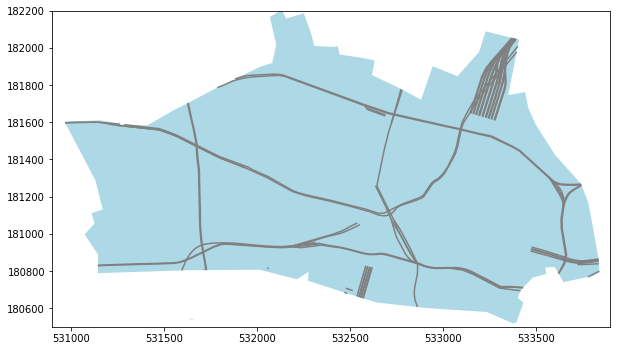

In [88]:
plt.rcParams['figure.figsize'] = (10, 8)
ax = plt.gca()
city_london.plot(ax=ax, color='lightblue')
rc_l.plot(ax=ax, edgecolor='grey')
ax.set_xlim(530900, 533900); ax.set_ylim(180500, 182200)
ax.set_aspect('equal')
plt.show()

In [89]:
type(rc_l)

geopandas.geoseries.GeoSeries

In [90]:
rc_l = gpd.GeoDataFrame({'geometry': rc_l})

In [91]:
rc_l.shape

(227, 1)

In [92]:
city_ldn.shape

(6, 7)

The output is more tidy than **lambada** method, and you may be interested to check the spatial relationships between rc_l and city_london then, feel free to write your own codes. 

**Hint**: `contains`, `crosses` and `touches`.

### <a id='Join the spatial data'>Join the spatial data<a/>

We had introduced you how to join or merge dataframes through functionality provided in Pandas, see [full documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html)；we have seen the notion of spatial relationships between geometry objects: within, contains, intersects, ..., now we are going to transfer attributes from one layer to another based on their spatial relationship by using `geopandas.sjoin` function with following elements:
- The GeoDataFrame to which we want add information
- The GeoDataFrame that contains the information we want to add
- The spatial relationship we want to use to match both datasets ('intersects', 'contains', 'within')
- The type of join: left or inner join

Since the stations and railway network clipped to the extent of City of London have prepared already, let's determine which LSOAs intersect the railway network within City of London. 

In [93]:
# spatial join, lsoas with stations
lsoas_with_stations = gpd.sjoin(city_ldn, stations_clip, op='contains', how='inner')
lsoas_with_stations.head()

,lsoa11cd,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,dummy,index_right,id,latitude,longitude,name,display_na,zone,total_line,rail
City of London 001A,E01000001,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",1.0,12,14,51.5204,-0.0979,Barbican,None,1.0,3,0
City of London 001E,E01000005,City of London 001E,4,1.907388e+05,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",1.0,1,2,51.5143,-0.0755,Aldgate,None,1.0,2,0
City of London 001E,E01000005,City of London 001E,4,1.907388e+05,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",1.0,229,262,51.5106,-0.0743,Tower Gateway,Tower<br />Gateway,1.0,1,0
City of London 001F,E01032739,City of London 001F,31921,1.658496e+06,7441.243976,(POLYGON ((533410.9246247204 182043.9986249523...,1.0,22,25,51.5120,-0.1031,Blackfriars,None,1.0,2,0
City of London 001F,E01032739,City of London 001F,31921,1.658496e+06,7441.243976,(POLYGON ((533410.9246247204 182043.9986249523...,1.0,219,250,51.5146,-0.0973,St. Paul's,St. Paul's,1.0,1,0


If we scroll to the right of the DataFrame output, we see a column labeled "index_right". The values in this column indicate the index of the features in the right DataFrame (in our case the stations) within the feature in the current row of the left DataFrame (the lsoas).

You may noticed that spatial join operation doesn't change the geometries. In another word, we are not joining respective geometries, but joining attributes based on a spatial relationship between the geometries. This means that the geometries need to at least overlap partially.

In [94]:
lsoas_with_stations.shape # check the number of rows and columns

(11, 16)

As usual, we need to further clean our joined data by dropping some useless columns, and further check the **crs** for all relevant layers.

In [95]:
a=lsoas_with_stations.drop(['dummy', 'index_right', 'display_na'], axis=1)
a.crs

{'init': 'epsg:27700'}

In [96]:
city_ldn.crs

{'init': 'epsg:27700'}

In [97]:
rc_l.crs

You are not wrong! It should be blank, as the railway DataFrame does not have a **crs**. To correct this, we need to set it to that of the city_ldn dataframe:

In [98]:
rc_l.crs = city_ldn.crs # create a crs for the rc_l
rc_l = rc_l.to_crs(city_ldn.crs) # update the coordinates accordingly

All prepared, and let's join!

In [99]:
# spatial join again
lsoas_with_stations_railways = gpd.sjoin(a, rc_l, how='inner', op='intersects')
lsoas_with_stations_railways

,lsoa11cd,lsoa11nmw,objectid,st_areasha,st_lengths,geometry,id,latitude,longitude,name,zone,total_line,rail,index_right
City of London 001A,E01000001,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",14,51.5204,-0.0979,Barbican,1.0,3,0,135
City of London 001A,E01000001,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",14,51.5204,-0.0979,Barbican,1.0,3,0,7
City of London 001A,E01000001,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",14,51.5204,-0.0979,Barbican,1.0,3,0,82
City of London 001A,E01000001,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",14,51.5204,-0.0979,Barbican,1.0,3,0,85
City of London 001A,E01000001,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",14,51.5204,-0.0979,Barbican,1.0,3,0,86
City of London 001A,E01000001,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",14,51.5204,-0.0979,Barbican,1.0,3,0,6
City of London 001A,E01000001,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",14,51.5204,-0.0979,Barbican,1.0,3,0,8
City of London 001A,E01000001,City of London 001A,1,1.333208e+05,2291.846072,"POLYGON ((532105.3302893325 182017.3864794874,...",14,51.5204,-0.0979,Barbican,1.0,3,0,9
City of London 001E,E01000005,City of London 001E,4,1.907388e+05,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",2,51.5143,-0.0755,Aldgate,1.0,2,0,66
City of London 001E,E01000005,City of London 001E,4,1.907388e+05,2167.868343,"POLYGON ((533808.1704519053 180773.9104895283,...",262,51.5106,-0.0743,Tower Gateway,1.0,1,0,66


In [100]:
# shape for joined data with lsoa, railways and stations in City of London
lsoas_with_stations_railways.shape

(1402, 14)

So far, three layers had joined together, and you may want to save it into shapefile data for further use. Please do as you wish if interested.

## <a id="Buffering">Buffering<a/>

Buffers are one of the classical GIS operations, in that with a particular geometric object as the target, we define a specific radious/distance from its envelope, then a geometry is drawn around the target with an envelope at the defined distance. These are very useful, for instance, in combination with point-in-polygon operations to calculate accessibility, catchment areas, etc. In last practical, we had actually started to use the point-in-polygon operation when getting the heatmap for London pubs, through counting the number of pubs in each LSOA. Buffer could be taken one step further, on generating guard areas that can be added for a specified distance (or a range) around points, lines or polygons. Besides, buffers could play the role as basis for specific spatial operations, e.g. overlay, through calling `buffer` in `Shapely`, and we will further use it for next week. 

We can use `geopandas` by simply calling the `buffer` method, passing it the the radius. Mind that the radius needs to be specified in the same units as the CRS of the geometry you are working with, hence we with generate 50 meters and 100 meters buffers respectively for each dataset to compare the effects from radius visually. Now let's try to produce buffers for **varied shapes** in City of London.

Buffers could be applied not only on **points** data, but also **polylines** and **polygons** data. So in this section, we will use the stations, railways and lsoas within the boundary of City of London as an example, to show you the buffering function for specified points, polylines and polygons. 

Let us firstly get a 50 metres buffer around each station in City of London, and then 100 metres buffer.

In [102]:
buf_50_s = stations_clip.buffer(50)
buf_100_s = stations_clip.buffer(100)

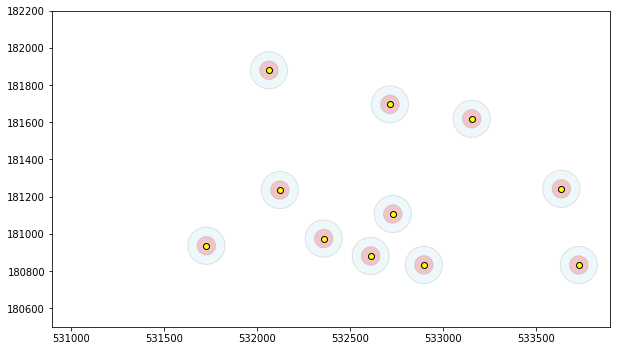

In [103]:
plt.rcParams['figure.figsize'] = (10, 8)
ax = plt.gca()
buf_100_s.plot(ax=ax,color='lightblue', edgecolor='grey', alpha=0.2)
buf_50_s.plot(ax=ax,color='red', edgecolor='grey', alpha=0.2)
stations_clip.plot(ax=ax, color='yellow', edgecolor='k')
ax.set_xlim(530900, 533900); ax.set_ylim(180500, 182200)
ax.set_aspect('equal')
plt.show()

The buffering operation for polyline, railways in city of london, is similar to what we've done to points data, so let's try to complete task 6.
### <a id="Task 10">Task 10<a/>
1. Create 50 meters and 100 meters buffers for railways in City of London respectively;
2. Plot them below following the similar methods as above.

In [104]:
buf_50_r = rc_l.buffer(50)
buf_100_r = rc_l.buffer(100)

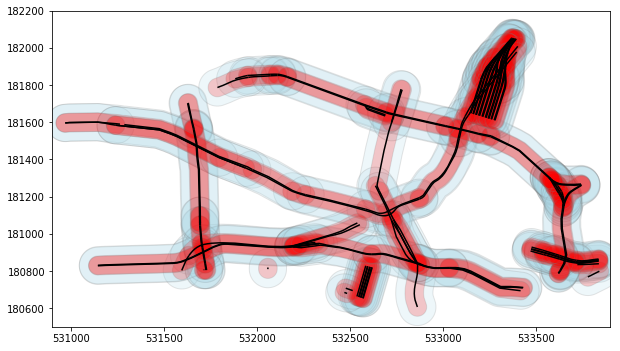

In [105]:
plt.rcParams['figure.figsize'] = (10, 8)
ax = plt.gca()
buf_100_r.plot(ax=ax,color='lightblue', edgecolor='grey', alpha=0.2)
buf_50_r.plot(ax=ax,color='red', edgecolor='grey', alpha=0.2)
rc_l.plot(ax=ax, color='k', edgecolor='grey')
ax.set_xlim(530900, 533900); ax.set_ylim(180500, 182200)
ax.set_aspect('equal')
plt.show()

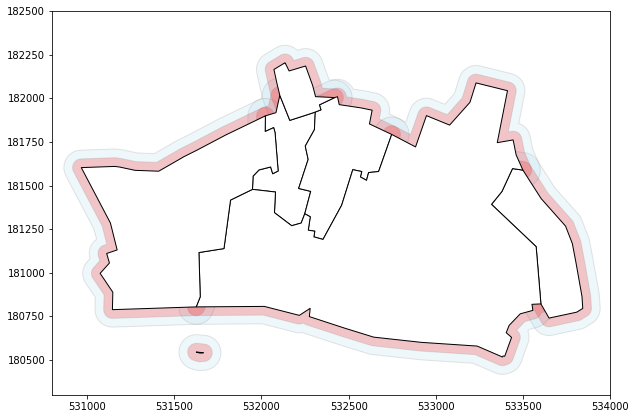

In [106]:
buf_50_c=city_ldn.buffer(50)
buf_100_c=city_ldn.buffer(100)

ax = plt.gca()
buf_100_c.plot(ax=ax,color='lightblue', edgecolor='grey', alpha=0.2)
buf_50_c.plot(ax=ax,color='red', edgecolor='grey', alpha=0.2)
city_ldn.plot(ax=ax, color='white', edgecolor='k')
ax.set_xlim(530800, 534000); ax.set_ylim(180300, 182500)
ax.set_aspect('equal')
plt.show()

Discuss with your neighbors: How if we choose a negative buffer distance? What will happen to the geometry? How about a zero buffer then? Have your codes here:

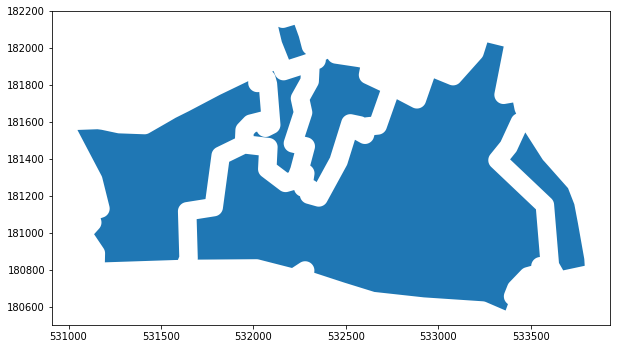

In [107]:
buf_neg50_c=city_ldn.buffer(-50)
buf_neg50_c.plot()

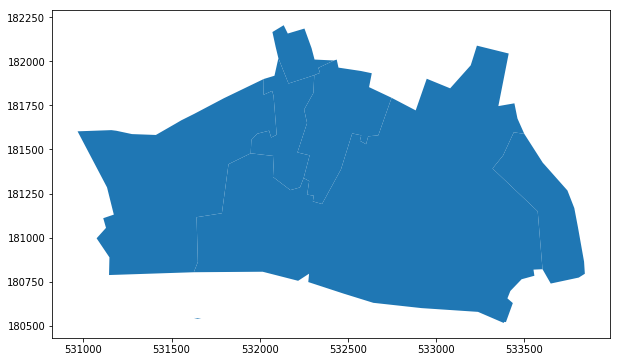

In [108]:
buf_zero_c=city_ldn.buffer(0)
buf_zero_c.plot()

If we want to read the ballpark boundary of buffers, for example the 100 meters' buffers for varied shapes, you may call `Bounding Box` to make the smallest possible rectangle that completely encloses your buffered area. The output could be just a tuple of the "minx", "miny", "maxx", "maxy".

In [109]:
buf_s_bb=buf_100_s.bounds
buf_r_bb=buf_100_r.bounds
buf_c_bb=buf_100_c.bounds
print(buf_s_bb, buf_r_bb, buf_c_bb)

              minx           miny           maxx           maxy
1    533537.930173  181141.531008  533737.930173  181341.531008
11   532631.900061  181006.506100  532831.900061  181206.506100
12   531966.088380  181779.235391  532166.088380  181979.235391
22   531629.550660  180835.763829  531829.550660  181035.763829
37   532512.808821  180780.839624  532712.808821  180980.839624
136  533055.917396  181518.355281  533255.917396  181718.355281
140  532260.401928  180874.410351  532460.401928  181074.410351
145  532798.757417  180732.669578  532998.757417  180932.669578
146  532616.505764  181595.882000  532816.505764  181795.882000
219  532024.483718  181135.339282  532224.483718  181335.339282
229  533632.018165  180732.271204  533832.018165  180932.271204               minx           miny           maxx           maxy
0    533081.337445  181538.941482  533337.924373  181921.050503
1    533375.938595  180802.104095  533639.389106  181019.782198
2    533520.416507  181127.369781  53373

# Credits!